In [1]:
## Importing the needed libraries:-

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'file:///C:\Users\USER\Downloads\instagram_reach.csv')
data

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [3]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
data.shape

(100, 8)

In [6]:
# Remove unnecessary columns
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)

In [7]:
data.head(3)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25


# Checking for  Null Values

In [8]:
data.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [9]:
## Droping the Null 
data = data.dropna()

In [10]:
## Crosschecking for Null Values
data.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [11]:
# Columns Present in dataset:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [12]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


# Performing EDA

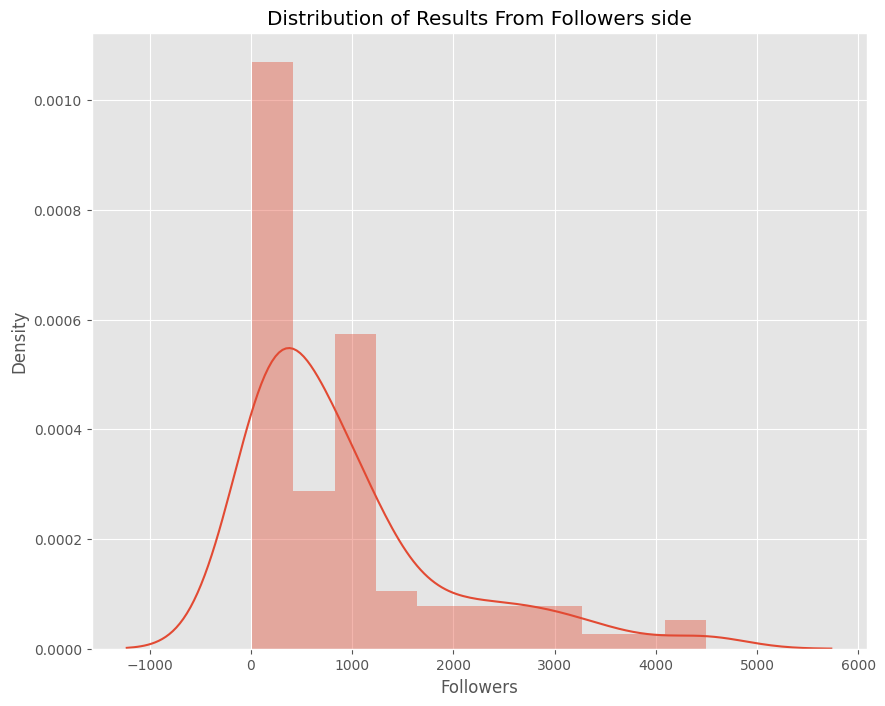

In [13]:
## Distribution of Impressions From Followers side

plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.title("Distribution of Results From Followers side")
sns.distplot(data['Followers'])
plt.show()


In [16]:
## Relation between Likes and Followers


followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources')
fig.show()

In [17]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers

figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols",
                    title = "Relationship Between Likes and Followers")
figure.show()

In [18]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'


In [19]:
# Split the data into training and testing sets

X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)


In [22]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [24]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1816.357567332351


In [25]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [26]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train a model to predict the time since posted using Random Forest Regressor
time_since_posted_rf_model = RandomForestRegressor()
time_since_posted_rf_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_rf_predictions = time_since_posted_rf_model.predict(X_test_encoded)
time_since_posted_rf_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_rf_predictions)
print("Mean Squared Error (Time Since Posted - Random Forest):", time_since_posted_rf_mse)


Mean Squared Error (Time Since Posted - Random Forest): 16.482105263157894
